In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


[list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)

In [3]:
# read the data
input_dir = '/Users/junheyang/Desktop/working_docs/Accelerator/data/Output/Reddit'

all_files = pd.concat([
    pd.read_csv(os.path.join(input_dir, file))
    for file in os.listdir(input_dir)
    if file.endswith('.csv')
])

# equivalent
csv_files = []
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path)
        csv_files.append(df)
all_files = pd.concat(csv_files)

# save the data
#all_files.to_csv('/Users/junheyang/Desktop/working_docs/Accelerator/data/Output/Reddit/all_files.csv', index=False)


In [17]:
all_files.head()

,id_submission,name,created_utc_submission,title,selftext,subreddit_submission,id_comment,subreddit_comment,created_utc_comment,body,link_id,parent_id
0,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,cr1n0gz,truechildfree,2015-05-07 18:13:18,You can do it! Just please make sure to take y...,t3_3574mw,t3_3574mw
1,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,cr21ui2,truechildfree,2015-05-08 00:57:56,"Awesome, I'm a bit jealous!",t3_3574mw,t3_3574mw
2,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,cr21vda,truechildfree,2015-05-08 00:58:40,"Curious, OP said they would be under for the p...",t3_3574mw,t1_cr1n0gz
3,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,cr2bxcr,truechildfree,2015-05-08 07:26:37,Oh I didn't see that. It's not typically recom...,t3_3574mw,t1_cr21vda
4,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,cr31czo,truechildfree,2015-05-08 22:45:50,Yeeeeaaaah that's terrifying. Sounds like goin...,t3_3574mw,t1_cr2bxcr


In [36]:
# how many unique submission are there?
all_files.groupby(['subreddit_submission'])['id_submission'].nunique()


subreddit_submission
hysterectomy     33
truechildfree    54
Name: id_submission, dtype: int64

Is unique user ever a question? Does Reddit allow multiple entries for the same user?

In [13]:
# Convert the timestamp column to datetime
all_files['created_utc_comment'] = pd.to_datetime(all_files['created_utc_comment'])
all_files['created_utc_submission'] = pd.to_datetime(all_files['created_utc_submission'])

In [12]:
print("Earliest comment:", all_files['created_utc_comment'].min())

print("Latest comment:", all_files['created_utc_comment'].max())

Earliest comment: 2014-03-14 17:43:36
Latest comment: 2022-11-22 17:47:34


In [30]:
# Group by subreddit and show date ranges
for subreddit in all_files['subreddit_submission'].unique():
    subreddit_data = all_files[all_files['subreddit_submission'] == subreddit]
    print(f"\nSubreddit: {subreddit}")
    print("Earliest submission:", subreddit_data['created_utc_submission'].min())
    print("Latest submission:", subreddit_data['created_utc_submission'].max())


Subreddit: truechildfree
Earliest submission: 2014-03-14 14:54:48
Latest submission: 2022-09-25 19:26:32

Subreddit: nan
Earliest submission: NaT
Latest submission: NaT

Subreddit: hysterectomy
Earliest submission: 2019-01-17 14:21:32
Latest submission: 2022-11-22 14:21:01


How to handle NAs?

In [33]:
# average length of comment body
# Calculate average length of comment body
all_files['body_length'] = all_files['body'].str.len()
average_length = all_files['body_length'].mean()
print(f"Average comment length: {average_length:.2f} characters")

# If you want to see the distribution
print("\nComment length statistics:")
print(all_files['body_length'].describe())

Average comment length: 469.47 characters

Comment length statistics:
count     415.000000
mean      469.472289
std       574.001754
min         2.000000
25%       143.500000
50%       307.000000
75%       577.500000
max      5074.000000
Name: body_length, dtype: float64


<Figure size 1000x600 with 0 Axes>

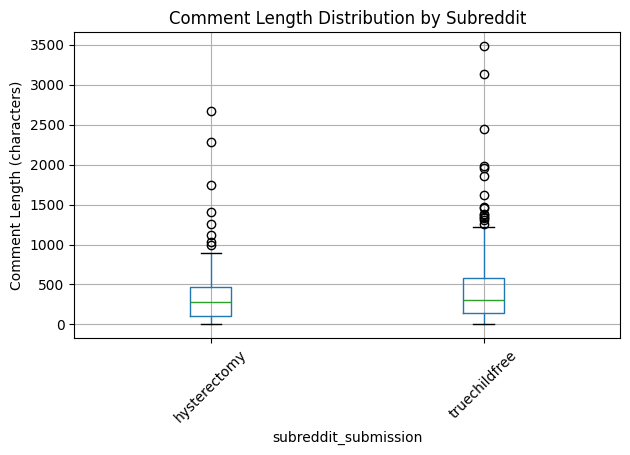

In [34]:
# Calculate comment length statistics by subreddit
subreddit_stats = all_files.groupby('subreddit_submission').agg({
    'body_length': ['count', 'mean', 'std', 'min', 'max']
}).round(2)

# a visual comparison
plt.figure(figsize=(10, 6))
all_files.boxplot(column='body_length', by='subreddit_submission', rot=45)
plt.title('Comment Length Distribution by Subreddit')
plt.ylabel('Comment Length (characters)')
plt.suptitle('')  # removes the automatic suptitle
plt.tight_layout()
plt.show()

a sentiment analysis that doesn't really make sense:

In [15]:
# sentiment analysis of the comments
# other possible packages: textblob, nltk, etc.
# no need to tokenize the comments when using vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

TypeError: 'float' object is not iterable

In [19]:
# Define a function to handle sentiment analysis with NaN checking
def get_sentiment(text):
    if pd.isna(text):  # Check if the text is NaN
        return None
    return analyzer.polarity_scores(str(text)) 

# apply the sentiment analyzer to the comments
all_files['sentiment'] = all_files['body'].apply(get_sentiment)

In [31]:
# plot the sentiment scores by time?
all_files['created_utc_comment'] = pd.to_datetime(all_files['created_utc_comment'])

# Extract compound score, handling None values
all_files['sentiment_score'] = all_files['sentiment'].apply(lambda x: x['compound'] if x is not None else None)

In [22]:
# check percentage of NAs
all_files['sentiment_score'].isna().mean()

np.float64(0.018912529550827423)

In [37]:
# sample a random 100 rows and see body and sentiment score
# show full column width
pd.set_option('display.max_colwidth', None)
all_files.sample(100)[['body', 'sentiment_score','title','selftext']]

body  \
275  I got sterilized when I was 22 (essure procedure) then later had a bi-salp. It was a decision I made quickly (to have surgery), but I had pretty much always known I never wanted to be a parent, much less pregnant. I can recall having pregnancy nightmares as early as 10 years old (well before I got my first period), and around age 7 my Barbie families never had babies. (I also never wanted a baby doll or anything like that, so it’s not like it was a surprise.)\n\nJust because you want to remain child free doesn’t mean you have to undergo surgery. There are always risks, and it’s important to make informed choices. The recovery times vary as well, which is something to consider. There’s also costs associated with the procedures, and insurance doesn’t always cover everything. I’m not saying don’t, because it’s your choice. But if I had known about the side effects of Essure when I had it done (they weren’t well known when I had mine placed), I may have requested a different method. \n\nI’m happy to talk more about it with you if you want to get a more in depth perspective. Ultimately whenever it feels right for you is the answer, because that’s different for everyone.   
297                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     I’ve had this done with Essure and it was fantastic!  No issues for me, but my doctor did it under general anesthesia as a precaution. I don’t think they do it anymore though. I personally didn’t have any issues from the procedure. Ended up having a hysterectomy last year for other reasons and they removed my tubes and Essure during that process.   
153                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Yay!! I'm so glad and not surprised that you had a great experience with Dr. De Haan too. :D I want everyone to have a doctor as capable and kind.   
75                                                                                                                                                                                                                                                                                                                                                                                                                              